In [1]:
using DifferentialEquations
using Plots

In [70]:
# Problem definition
function competition(u0, p, t)
    x, y = u0 # Initial populations sizes
    dx = p.R*x - p.A*x*x - p.B*x*y # variation of the x population
    dy = p.r*y - p.a*y*y - p.b*x*y # variation of the y population
    return [dx, dy]
end

competition (generic function with 1 method)

In [6]:
# Expression of the zero growth isoclines

# Eq 1
x_hat_1 = 0
y_hat_1 = 0

# Eq 2
x_hat_2 = R/A
y_hat_2 = 0

# Eq 3
x_hat_3 = 0
y_hat_3 = r/a

#Eq 4
x_hat_4 = (r*B-R*a)/(B*b-A*a)
y_hat_4 = (R*b-r*A)/(B*b-A*a)

UndefVarError: UndefVarError: R not defined

In [668]:
# Finding when equilibrium with 2 species is possible
# Initial population sizes 
u0 = [0.4, 0.6]

# t0 - t end
t = (0., 2000.)

function eq_2_sp(p)
    #println(p)
    w = p.B*p.b-p.A*p.a
    x̂ = (p.r*p.B - p.R*p.a)/w
    ŷ = (p.R*p.b - p.r*p.A)/w 
    return (x̂, ŷ)
end

function eq_1_sp_x(p)
    x̂ = (p.R/p.A)
    ŷ = 0
    return (x̂, ŷ)
end

function eq_1_sp_y(p)
    x̂ = 0
    ŷ = (p.r/p.a) 
    return (x̂, ŷ)
end

eq_2_sp_exists(p) =  (p.b/p.A < p.r/p.R < p.a/p.B)  
eq_2_sp_exists2(p) =   (p.a/p.B < p.r/p.R < p.b/p.A) 
#eq_2_sp_exists(p) = all(eq_2_sp(p).>1e-3)
eq_1_sp_exists_x(p) = ((p.r < p.R) & (p.a == p.A == p.b == p.B) | (p.A < p.a) & (p.r == p.R == p.b == p.B) | (p.B < p.b) & (p.a == p.A == p.r == p.R)) & ~ (p.b/p.A < p.r/p.R < p.a/p.B) & ~ (p.a/p.B < p.r/p.R < p.b/p.A)
eq_1_sp_exists_y(p) = ((p.R < p.r) & (p.a == p.A == p.b == p.B) | (p.a < p.A) & (p.r == p.R == p.b == p.B) | (p.b < p.B) & (p.a == p.A == p.r == p.R)) & ~ (p.b/p.A < p.r/p.R < p.a/p.B) & ~ (p.a/p.B < p.r/p.R < p.b/p.A)

#eq_1_sp_exists_x(p) = (solve(ODEProblem(competition, u0, t, p_combin))).u[end][2] < 1e-3
#eq_1_sp_exists_y(p) = (solve(ODEProblem(competition, u0, t, p_combin))).u[end][1] < 1e-3


# Grid for the search 
possible_values = 0.9:0.05:1.1

# Empty array for parameter values 
p_combin = []

# Grid search
for r in possible_values, R in possible_values
    for a in possible_values, A in possible_values
        for b in possible_values, B in possible_values
            p = (r=r, R=R, a=a, A=A, b=b, B=B)
            push!(p_combin, p) 
        end
    end
end

# Keep only parameters for which the 2sp equilibrium exists 
p_eq = filter(eq_2_sp_exists, p_combin)
p_eq2 = filter(eq_2_sp_exists2, p_combin)
p_x = filter(eq_1_sp_exists_x, p_combin)
p_y = filter(eq_1_sp_exists_y, p_combin)


110-element Array{Any,1}:
 (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.9, B = 0.95)    
 (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.9, B = 1.0)     
 (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.9, B = 1.05)    
 (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.9, B = 1.1)     
 (r = 0.9, R = 0.9, a = 0.9, A = 0.95, b = 0.9, B = 0.9)    
 (r = 0.9, R = 0.9, a = 0.9, A = 1.0, b = 0.9, B = 0.9)     
 (r = 0.9, R = 0.9, a = 0.9, A = 1.05, b = 0.9, B = 0.9)    
 (r = 0.9, R = 0.9, a = 0.9, A = 1.1, b = 0.9, B = 0.9)     
 (r = 0.95, R = 0.9, a = 0.9, A = 0.9, b = 0.9, B = 0.9)    
 (r = 0.95, R = 0.9, a = 0.95, A = 0.95, b = 0.95, B = 0.95)
 (r = 0.95, R = 0.9, a = 1.0, A = 1.0, b = 1.0, B = 1.0)    
 (r = 0.95, R = 0.9, a = 1.05, A = 1.05, b = 1.05, B = 1.05)
 (r = 0.95, R = 0.9, a = 1.1, A = 1.1, b = 1.1, B = 1.1)    
 ⋮                                                          
 (r = 1.1, R = 1.05, a = 0.95, A = 0.95, b = 0.95, B = 0.95)
 (r = 1.1, R = 1.05, a = 1.0, A = 1.0, b = 1.0, B = 1.0)   

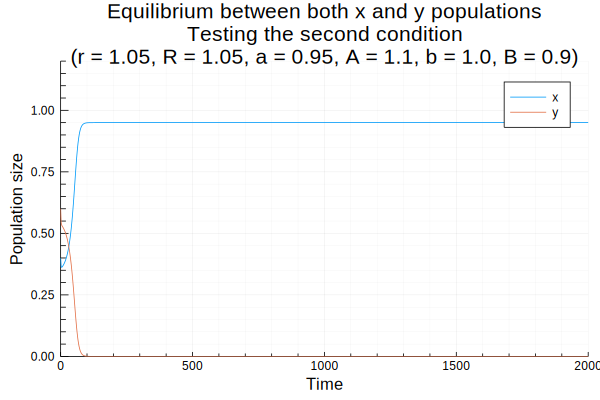

In [667]:
# Definition of problem

rand_p_x = rand(p_x)
rand_p_y = rand(p_y)
rand_p_xy = rand(p_eq)
rand_p_xy2 = rand(p_eq2)

prob_x = ODEProblem(competition, u0, t, rand_p_x)
prob_y = ODEProblem(competition, u0, t, rand_p_y)
prob_xy = ODEProblem(competition, u0, t, rand_p_xy)
prob_xy2 = ODEProblem(competition, u0, t, rand_p_xy2)


# Resolution of problem
solution_x = solve(prob_x)
solution_y = solve(prob_y)
solution_xy = solve(prob_xy)
solution_xy2 = solve(prob_xy2)


p4 = plot(solution_xy2, title = "Equilibrium between both x and y populations \nTesting the second condition \n$(rand_p_xy)", xlab="Time", ylab="Population size")
plot(p4, lab=["x" "y"], ylim=(0,1.2), minorgrid=true)


#plot(p1, p2, p3, ylim=(0,1.2), legend = false)
#print(solution_xy.u[end][1])

Expected value of (x̂,ŷ): (1.0, 0)

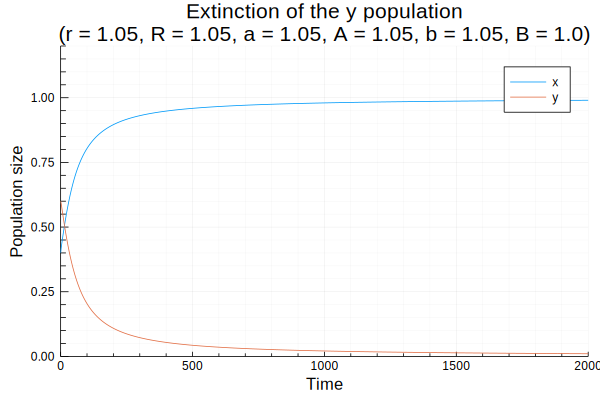

In [570]:
print("Expected value of (x̂,ŷ): $(eq_1_sp_x(rand_p_x))")
p1 = plot(solution_x, title = "Extinction of the y population \n$(rand_p_x)", xlab="Time", ylab="Population size")
plot(p1, lab=["x" "y"], ylim=(0,1.2), minorgrid=true)

Expected value of (x̂,ŷ):(0, 1.0)

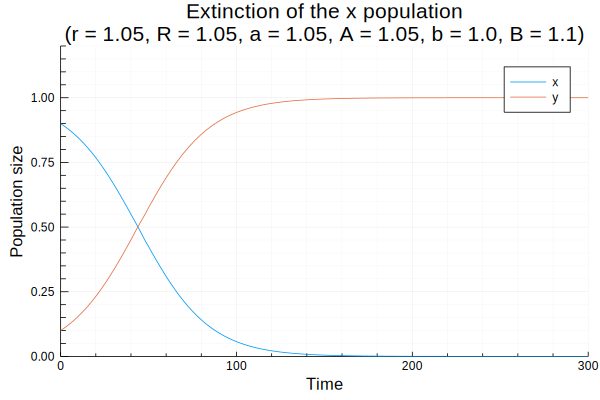

In [360]:
print("Expected value of (x̂,ŷ):")
print(eq_1_sp_y(rand_p_y))
p2 = plot(solution_y, title = "Extinction of the x population \n$(rand_p_y)", xlab="Time", ylab="Population size")
plot(p2, lab=["x" "y"], ylim=(0,1.2), minorgrid=true)

Expected value of (x̂,ŷ):(0.5128205128205137, 0.5128205128205126)

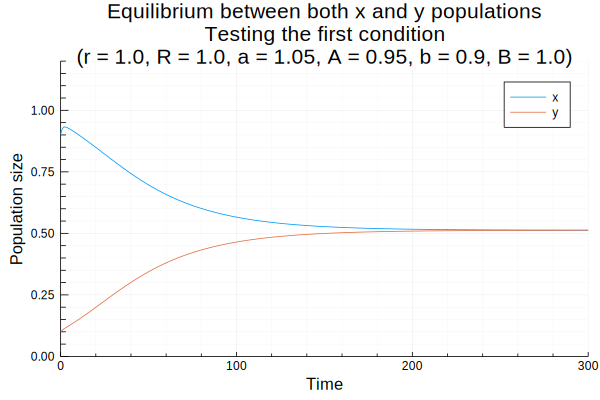

In [357]:
print("Expected value of (x̂,ŷ):")
print(eq_2_sp(rand_p_xy))
p3 = plot(solution_xy, title = "Equilibrium between both x and y populations \nTesting the first condition\n$(rand_p_xy)", xlab="Time", ylab="Population size")
plot(p3, lab=["x" "y"], ylim=(0,1.2), minorgrid=true)

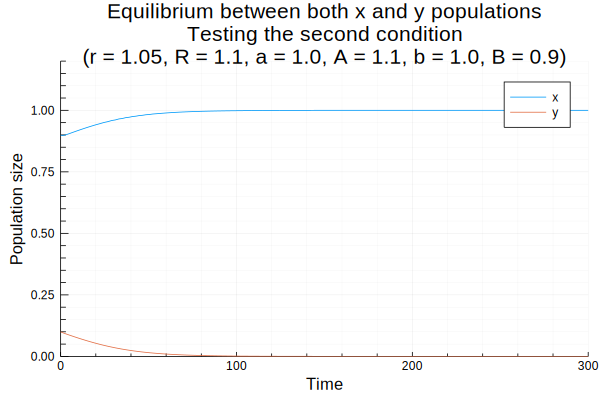

In [348]:
p4 = plot(solution_xy2, title = "Equilibrium between both x and y populations \nTesting the second condition \n$(rand_p_xy)", xlab="Time", ylab="Population size")
plot(p4, lab=["x" "y"], ylim=(0,1.2), minorgrid=true)

(20.0000000000004, -20.000000000000444)(0.6779661016949156, 0.3389830508474578)(0.6122448979591839, 0.4081632653061222)(0.5, 0.4999999999999996)(0.0, 1.0526315789473688)salut(2.352941176470585, -1.17647058823529)(1.3793103448275876, -0.3448275862068971)(-0.0, 1.0526315789473697)salut(Inf, -Inf)(0.5263157894736843, 0.5263157894736843)(0.6349206349206342, 0.3174603174603171)(0.909090909090911, 0.0)(-0.5263157894736848, 1.5789473684210544)salut(0.5000000000000002, 0.5000000000000002)(0.4081632653061222, 0.6122448979591839)(0.909090909090909, -0.0)(-0.8333333333333349, 1.6666666666666679)salut(6.6666666666668, -6.666666666666814)(-2.4999999999999902, 3.74999999999999)salut(0.5, 0.5000000000000011)(-0.45454545454545364, 1.3636363636363609)salut(2.000000000000002, -1.0000000000000022)(-0.0, 1.0)salut(0.9090909090909091, 0.0)(NaN, NaN)(-10.000000000000222, 10.0000000000002)salut(0.47619047619047566, 0.47619047619047566)(1.3793103448275876, -0.3448275862068971)(0.6349206349206342, 0.3174603174

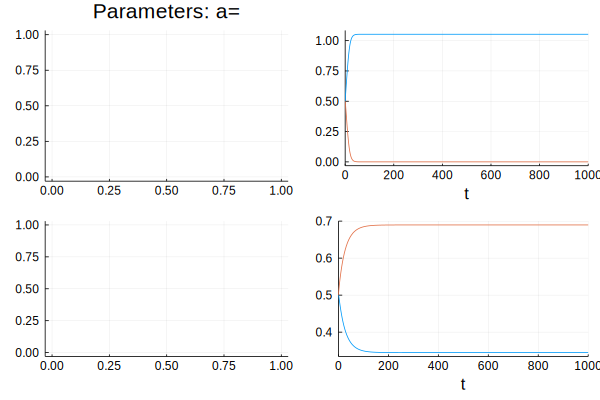

In [250]:
# simulation of 4 combinaisons of parameters 1
solution1 = []
solution2 = []
solution3 = []
solution4 = []

for z in 1:100
    # Parameters
    x = rand(p_combin)
    print(eq_2_sp(x))
    if (eq_2_sp(x)[1] < 1e-1)
        print("salut")
        prob2 = ODEProblem(competition, u0, t, x)
        # Resolution of problem
        solution2 = solve(prob2)
    end
    if (eq_2_sp(x)[2] < 1e-1)
        prob_eq_3 = ODEProblem(competition, u0, t, x)
        # Resolution of problem
        solution_eq_3 = solve(prob_eq_3)
    end
    if (eq_2_sp(x)[1] > 0.05 && eq_2_sp(x)[2] > 0.05)
        # Definition of problem
        prob4 = ODEProblem(competition, u0, t, x)
        # Resolution of problem
        solution4 = solve(prob4)
        #push!(solution_graph, solution) 
    end 
end

# Plot
#p1 = plot(solution_graph[1], title = "Parameters: a=")
#p2 = plot(solution_graph[2])
#p3 = plot(solution_graph[3])
#p4 = plot(solution_graph[4])
#plot(p1,p2,p3,p4,layout=(2,2), legend=false)
            
# Plot
p1 = plot(solution1, title = "Parameters: a=")
p2 = plot(solution2)
p3 = plot(solution3)
p4 = plot(solution4)
plot(p1,p2,p3,p4,layout=(2,2), legend=false)


    #plot(solution)
    #plot(solution, vars=(1,2), xlab="x", ylab="y", aspectratio=1, xlim=(0,1), ylim=(0,1))
    #scatter!([u0[1]], [u0[2]], c=:black, lab="u0")

(0.5, 0.5)

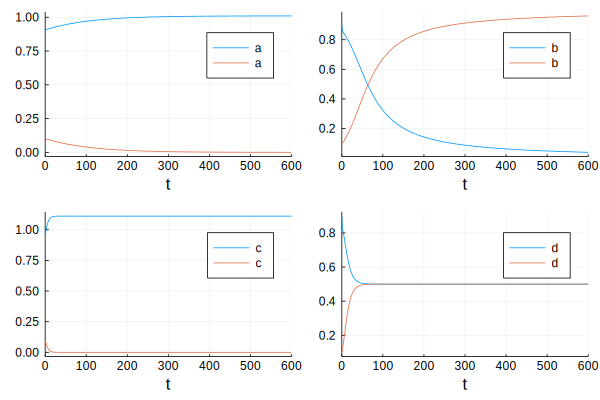

In [372]:
# simulation of 4 combinaisons of parameters 2
solution_graph = []

# Parameters
p_eq_2 = (r=1.0, R=1.0, a=1.01, A=0.99, b=1.0, B=1.0)
p_eq_3 = (r = 0.9, R = 0.9, a = 0.9, A = 0.95, b = 0.9, B = 0.9)
p_eq_4_1 = (r=1.0, R=1.0, a=0.9, A=0.9, b=1.1, B=1.1)
p_eq_4_2 = (r=1.0, R=1.0, a=1.1, A=1.1, b=0.9, B=0.9)

print(eq_2_sp(p_eq_4_1))

# Definition of problem
prob_2 = ODEProblem(competition, u0, t, p_eq_2)
prob_3 = ODEProblem(competition, u0, t, p_eq_3)
prob_4_1 = ODEProblem(competition, u0, t, p_eq_4_1)
prob_4_2 = ODEProblem(competition, u0, t, p_eq_4_2)

# Resolution of problem
solution_4_1 = solve(prob_4_1)
solution_4_2 = solve(prob_4_2)
solution_2 = solve(prob_2)
solution_3 = solve(prob_3)

p2 = plot(solution_2, label="a")
p3 = plot(solution_3, label="b")
p4_1 = plot(solution_4_1, label="c")
p4_2 = plot(solution_4_2, label="d")

plot(p2,p3,p4_1,p4_2)
#print(solution_2)

In [182]:

p = rand(p_eq)
print(eq_2_sp(p))
print(eq_2_sp(p)[1])
print(eq_2_sp(p)[2])

if (eq_2_sp(p)[1] > 0.4 && eq_2_sp(p)[2] > 0.4)
    print("PLUS GRAND")
else
    print("PLUS PETIT")
end

(0.23529411764705876, 0.7058823529411763)0.235294117647058760.7058823529411763PLUS PETIT

In [186]:
for i in 1:1000
    p = rand(p_eq)
    print(eq_2_sp(p))
end

(0.5000000000000011, 0.5)(0.6896551724137928, 0.3448275862068968)(0.4651162790697672, 0.4651162790697672)(0.7142857142857146, 0.35714285714285693)(0.4878048780487802, 0.4878048780487802)(0.5882352941176466, 0.39215686274509803)(0.5128205128205126, 0.5128205128205137)(0.38461538461538464, 0.5769230769230769)(0.48780487804878075, 0.48780487804878075)(0.25641025641025655, 0.769230769230769)(0.8000000000000006, 0.2666666666666665)(0.5, 0.5)(0.21276595744680835, 0.8510638297872348)(0.8510638297872348, 0.21276595744680835)(0.2469135802469138, 0.7407407407407408)(0.4651162790697672, 0.4651162790697672)(0.5000000000000002, 0.5000000000000002)(0.48780487804878075, 0.48780487804878075)(0.6666666666666666, 0.3333333333333333)(0.4999999999999997, 0.5000000000000002)(0.7058823529411763, 0.23529411764705876)(0.4040404040404043, 0.606060606060606)(0.5263157894736843, 0.5263157894736843)(0.38461538461538464, 0.5769230769230769)(0.7547169811320754, 0.18867924528301894)(0.32786885245901654, 0.6557377049

 0.2666666666666665)(0.3225806451612901, 0.6451612903225802)(0.6666666666666664, 0.3333333333333336)(0.3448275862068964, 0.6896551724137933)(0.23809523809523808, 0.7142857142857137)(0.7407407407407408, 0.2469135802469138)(0.8510638297872348, 0.21276595744680835)(0.47619047619047566, 0.47619047619047566)(0.4999999999999996, 0.5)(0.4999999999999996, 0.5)(0.7407407407407408, 0.2469135802469138)(0.5405405405405403, 0.5405405405405403)(0.5405405405405403, 0.5405405405405403)(0.2469135802469138, 0.7407407407407408)(0.47619047619047566, 0.47619047619047566)(0.6896551724137928, 0.3448275862068968)(0.7058823529411763, 0.23529411764705876)(0.6779661016949156, 0.3389830508474578)(0.6666666666666664, 0.3333333333333336)(0.3333333333333333, 0.6666666666666666)(0.5263157894736843, 0.5263157894736843)(0.5128205128205126, 0.5128205128205137)(0.3389830508474578, 0.6779661016949156)(0.4878048780487802, 0.4878048780487802)(0.8510638297872348, 0.21276595744680835)(0.5405405405405403, 0.5405405405405403)(0

2040816326530613, 0.8163265306122448)(0.47619047619047566, 0.47619047619047566)(0.3448275862068964, 0.6896551724137933)(0.2040816326530613, 0.8163265306122448)(0.6349206349206342, 0.3174603174603171)(0.5882352941176466, 0.39215686274509803)(0.4040404040404043, 0.606060606060606)(0.7594936708860761, 0.2531645569620254)(0.7058823529411763, 0.23529411764705876)(0.8000000000000006, 0.2666666666666665)(0.5, 0.5000000000000011)(0.2666666666666665, 0.8000000000000006)(0.4878048780487802, 0.4878048780487802)(0.5, 0.5)(0.3333333333333336, 0.6666666666666664)(0.4166666666666666, 0.6250000000000001)(0.5263157894736836, 0.5263157894736848)(0.5000000000000002, 0.4999999999999997)(0.8510638297872348, 0.21276595744680835)(0.3333333333333333, 0.6666666666666663)(0.6250000000000001, 0.4166666666666666)(0.3333333333333333, 0.6666666666666666)(0.47619047619047616, 0.47619047619047616)(0.5263157894736836, 0.5263157894736848)(0.47619047619047566, 0.47619047619047566)(0.5769230769230769, 0.38461538461538464

(0.5940594059405939, 0.39603960396039595)(0.3389830508474578, 0.6779661016949156)(0.5263157894736836, 0.5263157894736848)(0.3508771929824558, 0.7017543859649131)(0.606060606060606, 0.4040404040404043)(0.25641025641025655, 0.769230769230769)(0.4878048780487802, 0.4878048780487802)(0.25641025641025655, 0.769230769230769)(0.7894736842105272, 0.2631578947368418)(0.3448275862068963, 0.6896551724137941)(0.48780487804878075, 0.48780487804878075)(0.23809523809523808, 0.7142857142857137)(0.39215686274509803, 0.5882352941176466)(0.4081632653061222, 0.6122448979591839)(0.21276595744680835, 0.8510638297872348)(0.48780487804878075, 0.48780487804878075)(0.4081632653061222, 0.6122448979591839)(0.6666666666666663, 0.3333333333333333)(0.434782608695652, 0.5797101449275361)(0.4225352112676058, 0.5633802816901408)(0.6349206349206342, 0.3174603174603171)(0.19607843137254902, 0.7843137254901956)(0.5940594059405939, 0.39603960396039595)(0.25641025641025655, 0.769230769230769)(0.23809523809523808, 0.71428571

Any[(r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.95, B = 0.95), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.95, B = 1.0), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.95, B = 1.05), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 0.95, B = 1.1), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.0, B = 0.95), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.0, B = 1.0), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.0, B = 1.05), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.0, B = 1.1), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.05, B = 0.95), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.05, B = 1.0), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.05, B = 1.05), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.05, B = 1.1), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.1, B = 0.95), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.1, B = 1.0), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.1, B = 1.05), (r = 0.9, R = 0.9, a = 0.9, A = 0.9, b = 1.1, B = 1.1), (r = 0.9, R = 0.9, a = 0.9, A = 0.95, b = 1.0, B = 0.95), (r = 0.9, R = 0.9, a = 0.9

05, A = 1.1, b = 0.9, B = 0.9), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 0.9, B = 0.95), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 0.9, B = 1.0), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 0.95, B = 0.9), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 0.95, B = 0.95), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 0.95, B = 1.0), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.0, B = 0.9), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.0, B = 0.95), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.0, B = 1.0), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.05, B = 0.9), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.05, B = 0.95), (r = 0.9, R = 0.9, a = 1.05, A = 1.1, b = 1.05, B = 1.0), (r = 0.9, R = 0.9, a = 1.1, A = 0.95, b = 0.9, B = 0.9), (r = 0.9, R = 0.9, a = 1.1, A = 0.95, b = 0.9, B = 0.95), (r = 0.9, R = 0.9, a = 1.1, A = 0.95, b = 0.9, B = 1.0), (r = 0.9, R = 0.9, a = 1.1, A = 0.95, b = 0.9, B = 1.05), (r = 0.9, R = 0.9, a = 1.1, A = 1.0, b = 0.9, B = 0.9), (r = 0.9, R = 0.9, a = 1.1, A = 1.0, b = 0.9,

 = 1.0, A = 1.1, b = 1.05, B = 1.1), (r = 0.9, R = 0.95, a = 1.0, A = 1.1, b = 1.1, B = 1.1), (r = 0.9, R = 0.95, a = 1.05, A = 1.0, b = 0.9, B = 0.9), (r = 0.9, R = 0.95, a = 1.05, A = 1.0, b = 0.9, B = 0.95), (r = 0.9, R = 0.95, a = 1.05, A = 1.0, b = 0.9, B = 1.0), (r = 0.9, R = 0.95, a = 1.05, A = 1.0, b = 0.9, B = 1.05), (r = 0.9, R = 0.95, a = 1.05, A = 1.0, b = 0.9, B = 1.1), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.9, B = 0.9), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.9, B = 0.95), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.9, B = 1.0), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.9, B = 1.05), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.9, B = 1.1), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.95, B = 0.9), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.95, B = 0.95), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.95, B = 1.0), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.95, B = 1.05), (r = 0.9, R = 0.95, a = 1.05, A = 1.05, b = 0.95, B = 1.1), (r = 0.9, R = 0

 = 0.9, A = 1.05, b = 0.95, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.05, b = 1.0, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.05, b = 1.05, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.05, b = 1.1, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 0.9, B = 0.9), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 0.9, B = 0.95), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 0.9, B = 1.0), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 0.95, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 1.0, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 1.05, B = 1.1), (r = 0.9, R = 1.05, a = 0.9, A = 1.1, b = 1.1, B = 1.1), (r = 0.9, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 0.9), (r = 0.9, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 0.95), (r = 0.9, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 1.0), (r = 0.9, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 1.05), (r = 0.9, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 1.1), (r = 0.9, R = 1.05, a = 1.0, A = 1.1, b = 0.9, B = 0.9), (r = 0.9, R = 1.05, a = 1.0, A = 1.1

, R = 0.9, a = 1.1, A = 0.95, b = 1.05, B = 1.05), (r = 0.95, R = 0.9, a = 1.1, A = 0.95, b = 1.05, B = 1.1), (r = 0.95, R = 0.9, a = 1.1, A = 0.95, b = 1.1, B = 1.05), (r = 0.95, R = 0.9, a = 1.1, A = 0.95, b = 1.1, B = 1.1), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.9, B = 0.9), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.9, B = 0.95), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.9, B = 1.0), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.95, B = 0.9), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.95, B = 0.95), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 0.95, B = 1.0), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.0, B = 0.9), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.0, B = 0.95), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.0, B = 1.0), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.05, B = 0.9), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.05, B = 0.95), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.05, B = 1.0), (r = 0.95, R = 0.9, a = 1.1, A = 1.0, b = 1.1, B = 1.05), (r = 0.95, R = 0.9, a

95, R = 0.95, a = 1.05, A = 1.1, b = 1.0, B = 0.95), (r = 0.95, R = 0.95, a = 1.05, A = 1.1, b = 1.0, B = 1.0), (r = 0.95, R = 0.95, a = 1.05, A = 1.1, b = 1.05, B = 0.9), (r = 0.95, R = 0.95, a = 1.05, A = 1.1, b = 1.05, B = 0.95), (r = 0.95, R = 0.95, a = 1.05, A = 1.1, b = 1.05, B = 1.0), (r = 0.95, R = 0.95, a = 1.1, A = 0.95, b = 0.9, B = 0.9), (r = 0.95, R = 0.95, a = 1.1, A = 0.95, b = 0.9, B = 0.95), (r = 0.95, R = 0.95, a = 1.1, A = 0.95, b = 0.9, B = 1.0), (r = 0.95, R = 0.95, a = 1.1, A = 0.95, b = 0.9, B = 1.05), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.9, B = 0.9), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.9, B = 0.95), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.9, B = 1.0), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.9, B = 1.05), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.95, B = 0.9), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.95, B = 0.95), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.95, B = 1.0), (r = 0.95, R = 0.95, a = 1.1, A = 1.0, b = 0.95, B = 1.05

b = 1.05, B = 1.05), (r = 0.95, R = 1.0, a = 0.95, A = 1.1, b = 1.05, B = 1.1), (r = 0.95, R = 1.0, a = 0.95, A = 1.1, b = 1.1, B = 1.05), (r = 0.95, R = 1.0, a = 0.95, A = 1.1, b = 1.1, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.9, b = 0.9, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.9, b = 0.95, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.9, b = 1.0, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.9, b = 1.05, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.9, b = 1.1, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 0.9), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 0.95), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 1.0), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 1.05), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 0.95, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 1.0, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 1.05, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 0.95, b = 1.1, B = 1.1), (r = 0.95, R = 1.0, a = 1.0, A = 1.0, b = 0.9, B

R = 1.05, a = 0.95, A = 1.0, b = 0.95, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.0, b = 1.0, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.0, b = 1.05, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.0, b = 1.1, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 0.9, B = 0.9), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 0.9, B = 0.95), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 0.9, B = 1.0), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 1.0, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 1.05, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.05, b = 1.1, B = 1.1), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 0.9), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 0.95), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.9, B = 1.0), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.95, B = 0.9), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.95, B = 0.95), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 0.95, B = 1.0), (r = 0.95, R = 1.05, a = 0.95, A = 1.1, b = 1.0, B =

r = 1.0, R = 0.9, a = 0.95, A = 0.95, b = 1.1, B = 1.1), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.05, B = 0.95), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.05, B = 1.0), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.05, B = 1.05), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.05, B = 1.1), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.1, B = 0.95), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.1, B = 1.0), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.1, B = 1.05), (r = 1.0, R = 0.9, a = 1.0, A = 0.9, b = 1.1, B = 1.1), (r = 1.0, R = 0.9, a = 1.0, A = 0.95, b = 1.1, B = 0.95), (r = 1.0, R = 0.9, a = 1.0, A = 0.95, b = 1.1, B = 1.0), (r = 1.0, R = 0.9, a = 1.0, A = 0.95, b = 1.1, B = 1.05), (r = 1.0, R = 0.9, a = 1.0, A = 0.95, b = 1.1, B = 1.1), (r = 1.0, R = 0.9, a = 1.05, A = 0.9, b = 0.9, B = 0.9), (r = 1.0, R = 0.9, a = 1.05, A = 0.9, b = 0.95, B = 0.9), (r = 1.0, R = 0.9, a = 1.05, A = 0.9, b = 1.05, B = 0.95), (r = 1.0, R = 0.9, a = 1.05, A = 0.9, b = 1.05, B = 1.0), (r = 1.0, R = 0.9, a = 1.

 (r = 1.0, R = 0.95, a = 1.0, A = 0.95, b = 1.1, B = 1.05), (r = 1.0, R = 0.95, a = 1.0, A = 0.95, b = 1.1, B = 1.1), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 0.9, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 0.95, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 1.0, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 1.05, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 1.1, B = 1.0), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 1.1, B = 1.05), (r = 1.0, R = 0.95, a = 1.0, A = 1.0, b = 1.1, B = 1.1), (r = 1.0, R = 0.95, a = 1.0, A = 1.05, b = 0.9, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.05, b = 0.95, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.05, b = 1.0, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.05, b = 1.05, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.05, b = 1.1, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.1, b = 0.9, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.1, b = 0.95, B = 0.9), (r = 1.0, R = 0.95, a = 1.0, A = 1.1, b = 1.0, B = 0.9), (r = 1.0, R = 0.

.0, a = 0.95, A = 1.05, b = 1.1, B = 1.05), (r = 1.0, R = 1.0, a = 0.95, A = 1.05, b = 1.1, B = 1.1), (r = 1.0, R = 1.0, a = 0.95, A = 1.1, b = 0.9, B = 0.9), (r = 1.0, R = 1.0, a = 0.95, A = 1.1, b = 0.95, B = 0.9), (r = 1.0, R = 1.0, a = 0.95, A = 1.1, b = 1.0, B = 0.9), (r = 1.0, R = 1.0, a = 0.95, A = 1.1, b = 1.05, B = 0.9), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 0.95, B = 1.05), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 0.95, B = 1.1), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.0, B = 1.05), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.0, B = 1.1), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.05, B = 1.05), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.05, B = 1.1), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.1, B = 1.05), (r = 1.0, R = 1.0, a = 1.0, A = 0.9, b = 1.1, B = 1.1), (r = 1.0, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 0.9), (r = 1.0, R = 1.0, a = 1.0, A = 0.95, b = 0.9, B = 0.95), (r = 1.0, R = 1.0, a = 1.0, A = 0.95, b = 1.0, B = 1.05), (r = 1.0, R = 1.0, a = 1.0, A = 0.95, b

A = 0.9, b = 0.9, B = 1.05), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 0.9, B = 1.1), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 0.95, B = 1.0), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 0.95, B = 1.05), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 0.95, B = 1.1), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.0, B = 1.0), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.0, B = 1.05), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.0, B = 1.1), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.05, B = 1.0), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.05, B = 1.05), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.05, B = 1.1), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.1, B = 1.0), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.1, B = 1.05), (r = 1.0, R = 1.05, a = 0.95, A = 0.9, b = 1.1, B = 1.1), (r = 1.0, R = 1.05, a = 0.95, A = 0.95, b = 0.9, B = 0.9), (r = 1.0, R = 1.05, a = 0.95, A = 0.95, b = 0.9, B = 0.95), (r = 1.0, R = 1.05, a = 0.95, A = 0.95, b = 0.95, B = 1.0), (r = 1.0, R = 1.05, a = 0.95

 (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.0, B = 1.1), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.05, B = 1.0), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.05, B = 1.05), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.05, B = 1.1), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.1, B = 1.0), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.1, B = 1.05), (r = 1.0, R = 1.1, a = 0.9, A = 0.95, b = 1.1, B = 1.1), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 0.9, B = 0.9), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 0.9, B = 0.95), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 0.95, B = 1.0), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 0.95, B = 1.05), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 0.95, B = 1.1), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 1.0, B = 1.0), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 1.0, B = 1.05), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 1.0, B = 1.1), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 1.05, B = 1.0), (r = 1.0, R = 1.1, a = 0.9, A = 1.0, b = 1.05, B = 1.05), (r = 1.0, R = 1.1, a = 0.9

0.95, B = 0.9), (r = 1.05, R = 0.9, a = 1.1, A = 1.1, b = 1.0, B = 0.9), (r = 1.05, R = 0.9, a = 1.1, A = 1.1, b = 1.05, B = 0.9), (r = 1.05, R = 0.9, a = 1.1, A = 1.1, b = 1.1, B = 0.9), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.0, B = 0.9), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.0, B = 0.95), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.0, B = 1.0), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.0, B = 1.05), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.0, B = 1.1), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.05, B = 0.9), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.05, B = 0.95), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.05, B = 1.0), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.05, B = 1.05), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.05, B = 1.1), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.1, B = 0.9), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.1, B = 0.95), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.1, B = 1.0), (r = 1.05, R = 0.95, a = 0.9, A = 0.9, b = 1.1, 

1.1, A = 1.0, b = 1.05, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.0, b = 1.05, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.0, b = 1.1, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.0, b = 1.1, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 0.9, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 0.9, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 0.95, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 0.95, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.0, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.0, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.05, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.05, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.1, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.05, b = 1.1, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.1, b = 0.9, B = 0.9), (r = 1.05, R = 0.95, a = 1.1, A = 1.1, b = 0.9, B = 0.95), (r = 1.05, R = 0.95, a = 1.1, A = 1.1, b = 0.95, B = 0.9), (r = 1.05, R =

1.1, b = 0.9, B = 0.95), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 0.95, B = 0.9), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 0.95, B = 0.95), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.0, B = 0.9), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.0, B = 0.95), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.05, B = 0.9), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.05, B = 0.95), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.1, B = 0.9), (r = 1.05, R = 1.0, a = 1.05, A = 1.1, b = 1.1, B = 0.95), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 0.9, B = 0.9), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 0.9, B = 0.95), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 0.9, B = 1.0), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 0.95, B = 1.05), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 0.95, B = 1.1), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 1.0, B = 1.05), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 1.0, B = 1.1), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b = 1.05, B = 1.05), (r = 1.05, R = 1.0, a = 1.1, A = 0.9, b 

 = 1.1), (r = 1.05, R = 1.05, a = 1.05, A = 0.95, b = 1.05, B = 1.1), (r = 1.05, R = 1.05, a = 1.05, A = 0.95, b = 1.1, B = 1.1), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.9, B = 0.9), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.9, B = 0.95), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.9, B = 1.0), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.95, B = 0.9), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.95, B = 0.95), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 0.95, B = 1.0), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 1.05, B = 1.1), (r = 1.05, R = 1.05, a = 1.05, A = 1.0, b = 1.1, B = 1.1), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.9, B = 0.9), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.9, B = 0.95), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.9, B = 1.0), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 0.9), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 0.95), (r = 1.05, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 1.0), (r = 1.05, R = 1.05, a = 1.

 (r = 1.05, R = 1.1, a = 0.95, A = 1.1, b = 1.1, B = 1.0), (r = 1.05, R = 1.1, a = 0.95, A = 1.1, b = 1.1, B = 1.05), (r = 1.05, R = 1.1, a = 0.95, A = 1.1, b = 1.1, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 0.9, B = 1.05), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 0.9, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 0.95, B = 1.05), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 0.95, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.0, B = 1.05), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.0, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.05, B = 1.05), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.05, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.1, B = 1.05), (r = 1.05, R = 1.1, a = 1.0, A = 0.9, b = 1.1, B = 1.1), (r = 1.05, R = 1.1, a = 1.0, A = 0.95, b = 0.9, B = 0.9), (r = 1.05, R = 1.1, a = 1.0, A = 0.95, b = 0.9, B = 0.95), (r = 1.05, R = 1.1, a = 1.0, A = 0.95, b = 0.9, B = 1.0), (r = 1.05, R = 1.1, a = 1.0, A = 0.95, b = 0.95, B = 1.05), (r = 1.05,

0.9, b = 1.05, B = 1.0), (r = 1.1, R = 0.95, a = 1.1, A = 0.9, b = 1.05, B = 1.05), (r = 1.1, R = 0.95, a = 1.1, A = 0.9, b = 1.05, B = 1.1), (r = 1.1, R = 0.95, a = 1.1, A = 0.9, b = 1.1, B = 1.0), (r = 1.1, R = 0.95, a = 1.1, A = 0.9, b = 1.1, B = 1.05), (r = 1.1, R = 0.95, a = 1.1, A = 0.9, b = 1.1, B = 1.1), (r = 1.1, R = 0.95, a = 1.1, A = 0.95, b = 0.9, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 0.95, b = 0.95, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 0.95, b = 1.0, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 0.95, b = 1.05, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.0, b = 0.9, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.0, b = 0.95, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.0, b = 1.0, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.0, b = 1.05, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.0, b = 1.1, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.05, b = 0.9, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.05, b = 0.95, B = 0.9), (r = 1.1, R = 0.95, a = 1.1, A = 1.05, b = 1.0, 

 = 1.0, a = 1.1, A = 1.1, b = 0.95, B = 0.9), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 0.95, B = 0.95), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.0, B = 0.9), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.0, B = 0.95), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.05, B = 0.9), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.05, B = 0.95), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.1, B = 0.9), (r = 1.1, R = 1.0, a = 1.1, A = 1.1, b = 1.1, B = 0.95), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 0.95, B = 0.9), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 0.95, B = 0.95), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 0.95, B = 1.0), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 0.95, B = 1.05), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 0.95, B = 1.1), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 1.0, B = 0.9), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 1.0, B = 0.95), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 1.0, B = 1.0), (r = 1.1, R = 1.05, a = 0.9, A = 0.9, b = 1.0, B = 1.05), (r = 1.1, R = 1.05, a = 0.9, A = 

0.9, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 0.9, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 0.9, B = 1.0), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 0.95, B = 1.0), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.0, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.0, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.0, B = 1.0), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.05, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.05, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A = 1.05, b = 1.05, B = 1.0), (r = 1.1, R = 1.05, a = 1.05, A = 1.1, b = 0.9, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.1, b = 0.9, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A = 1.1, b = 0.9, B = 1.0), (r = 1.1, R = 1.05, a = 1.05, A = 1.1, b = 0.95, B = 0.9), (r = 1.1, R = 1.05, a = 1.05, A = 1.1, b = 0.95, B = 0.95), (r = 1.1, R = 1.05, a = 1.05, A 

A = 1.1, b = 1.0, B = 0.95), (r = 1.1, R = 1.1, a = 1.0, A = 1.1, b = 1.05, B = 0.9), (r = 1.1, R = 1.1, a = 1.0, A = 1.1, b = 1.05, B = 0.95), (r = 1.1, R = 1.1, a = 1.05, A = 0.9, b = 0.95, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.9, b = 1.0, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.9, b = 1.05, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.9, b = 1.1, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 0.9, B = 0.9), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 0.9, B = 0.95), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 0.9, B = 1.0), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 1.0, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 1.05, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 0.95, b = 1.1, B = 1.1), (r = 1.1, R = 1.1, a = 1.05, A = 1.0, b = 0.9, B = 0.9), (r = 1.1, R = 1.1, a = 1.05, A = 1.0, b = 0.9, B = 0.95), (r = 1.1, R = 1.1, a = 1.05, A = 1.0, b = 0.9, B = 1.0), (r = 1.1, R = 1.1, a = 1.05, A = 1.0, b = 0.95, B = 0.9), (r = 1.1, R = 1.1, a = 1.05, A = 1.0, b = 0.95